# Métricas

Una métrica es una función que define una distancia entre cada par de elementos de un conjunto. Para nuetro caso, se define una función de distancia entre los valores reales ($y$) y los valores predichos ($\hat{y}$).

Defeniremos algunas métricas bajo dos tipos de contexto: modelos de regresión y modelos de clasificación.

## Métricas para Regresión

Sabemos que los modelos de regresión buscan ajustar un modelo a valores numéricos que no reprensentan etiquetas. La idea es cuantificar el error y seleccionar el mejor modelo. El error corresponde a la diferencia entre el valor original y el valor predicho, es decir:

$$e_{i}=y_{i}-\hat{y}_{i} $$


Lo que se busca es medir el error bajo cierta funciones de distancias o métricas. Dentro de las métricas más populares se encuentran:

* Métricas absolutas: Las métricas absolutas o no escalada miden el error sin escalar los valores. Las métrica absolutas más ocupadas son:

    - Mean Absolute Error (MAE)

    $$\textrm{MAE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n}\left | y_{t}-\hat{y}_{t}\right |$$

    - Mean squared error (MSE):
    
    $$\textrm{MSE}(y,\hat{y}) =\dfrac{1}{n}\sum_{t=1}^{n}\left | y_{t}-\hat{y}_{t}\right |^2$$

* Métricas Porcentuales: Las métricas porcentuales o escaladas miden el error de manera escalada, es decir, se busca acotar el error entre valores de 0 a 1, donde 0 significa que el ajuste es perfecto, mientras que 1 sería un mal ajuste. Cabe destacar que muchas veces las métricas porcentuales puden tener valores mayores a 1.

    - Mean absolute percentage error (MAPE):

    $$\textrm{MAPE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n}\left | \frac{y_{t}-\hat{y}_{t}}{y_{t}} \right |$$

    - Symmetric mean absolute percentage error (sMAPE):
    
    $$\textrm{sMAPE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n} \frac{\left |y_{t}-\hat{y}_{t}\right |}{(\left | y_{t} \right |^2+\left | \hat{y}_{t} \right |^2)/2}$$

## Métricas para Clasificación

Sabemos que los modelos de clasificación etiquetan a los datos a partir del entrenamiento. Por lo tanto es necesario introducir nuevos conceptos.

Uno de ellos es la matriz de confusión. Típicamente para un clasificador binario se tiene:

* `TP`: Verdadero Positivo
* `FN`: Falso Negativo
* `FP`: Falso positivo
* `TN`: Verdadero Negativo

En este contexto, los valores `TP` y `TN` muestran los valores correctos que tuve al momento de realizar la predicción, mientras que los valores de de `FN` y `FP` denotan los valores en que la clasificación fue errónea.

Una manera eficaz de visualizar estos resultados es con la _matriz de confusión_

![confusion_matrix](https://miro.medium.com/max/1780/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg)

El siguiente ejemplo resolverá todas tus dudas

![meme_cm](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fskappal7.files.wordpress.com%2F2018%2F08%2Fconfusion-matrix.jpg%3Fw%3D748&f=1&nofb=1)

En un princpio se busca maximizar la suma de los elementos bien clasificados, sin embargo eso depende mucho del problema a resolver. Para esto se definen las siguientes métricas:

* Accuracy:

    $$\textrm{accuracy}= \frac{TP+TN}{TP+TN+FP+FN}$$
    
* Recall:

    $$\textrm{recall} = \frac{TP}{TP+FN}$$
    
* Precision:

    $$\textrm{precision} = \frac{TP}{TP+FP} $$
    
* F-score:

    $$\textrm{F_score} = 2\times \frac{  \textrm{precision} \times \textrm{recall} }{  \textrm{precision} + \textrm{recall} } $$

Estas son las más comunes, y como te imaginarás, `scikit-learn` tiene toda una artillería de selección de modelos en este [link](https://scikit-learn.org/stable/modules/model_evaluation.html).

## Ejemplo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Como siempre, obtengamos nuestra matriz de diseño y vector de respuesta

In [3]:
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [4]:
np.unique(y)

array([0, 1])

In [5]:
target_names = breast_cancer.target_names
target_names

array(['malignant', 'benign'], dtype='<U9')

Ajustemos un modelo de regresión logística a los datos

In [6]:
clf = LogisticRegression(max_iter=1000, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Rápidamente podemos visualizar la matriz de confusión

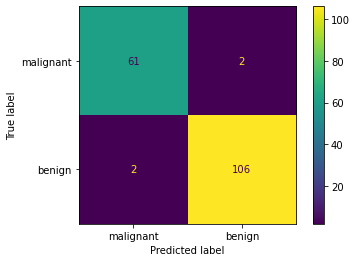

In [7]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, display_labels=target_names)
plt.show()

Como también calcular algunas métricas

In [8]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

print(f"Accuracy score: {accuracy_score(y_test, y_pred):0.2f}")
print(f"Recall score: {recall_score(y_test, y_pred):0.2f}")
print(f"F1 score: {f1_score(y_test, y_pred):0.2f}")

Accuracy score: 0.96
Recall score: 0.98
F1 score: 0.97


Incluso tener un reporte mucho más rápido

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Otra métrica interesante es _Average Precision (AP)_, la cual no es más que un promedio ponderado de la precisión alcanzada en cada umbral (_threshold_)

$$
AP = \sum_{n} (R_n - R_{n-1})P_n
$$
donde $P_n$ y $R_n$ son _precision_ y _recall_ correspondientes al $n$-ésimo umbral.

In [10]:
from sklearn.metrics import average_precision_score

print(f'Average precision-recall score: {average_precision_score(y_test, y_pred):0.2f}')

Average precision-recall score: 0.96


Pero donde uno puede sacar mucho provecho es con un gráfico que nos muestre la relación entre _precision_ y _recall_ a medida que varía el umbral

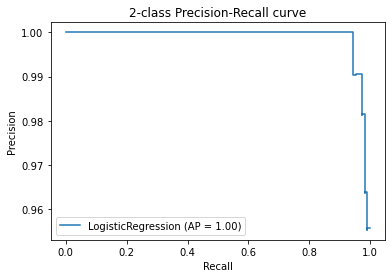

In [17]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title(f'2-class Precision-Recall curve');

Internamente, los umbrales del estimador varían y utiliza la predicción en probabilidad del estimador.

In [18]:
clf.predict_proba(X_test)

array([[1.89262882e-01, 8.10737118e-01],
       [9.99999998e-01, 1.93930893e-09],
       [9.98613630e-01, 1.38636999e-03],
       [3.21334977e-03, 9.96786650e-01],
       [7.46060622e-04, 9.99253939e-01],
       [1.00000000e+00, 1.82239523e-10],
       [1.00000000e+00, 7.05390806e-13],
       [9.87301125e-01, 1.26988750e-02],
       [3.17660122e-03, 9.96823399e-01],
       [9.02586100e-03, 9.90974139e-01],
       [6.48930359e-02, 9.35106964e-01],
       [9.99545359e-01, 4.54641290e-04],
       [9.36314243e-03, 9.90636858e-01],
       [8.55233942e-01, 1.44766058e-01],
       [1.50997587e-03, 9.98490024e-01],
       [9.99302433e-01, 6.97566906e-04],
       [2.05652011e-03, 9.97943480e-01],
       [3.91134050e-04, 9.99608866e-01],
       [8.31923233e-04, 9.99168077e-01],
       [9.99999950e-01, 5.01182674e-08],
       [1.52320625e-01, 8.47679375e-01],
       [1.52514816e-02, 9.84748518e-01],
       [1.00000000e+00, 2.59660733e-10],
       [4.60870991e-03, 9.95391290e-01],
       [1.451361